# NEHA RAGESH NAMBIAR
20BRS1110

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

dataset = pd.read_csv('play_tennis.csv')
X = dataset.iloc[:, 1:].values
# print(X)
attribute = ['outlook', 'temp', 'humidity', 'wind']


class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.childs = None


def findEntropy(data, rows):
    yes = 0
    no = 0
    ans = -1
    idx = len(data[0]) - 1
    entropy = 0
    for i in rows:
        if data[i][idx] == 'Yes':
            yes = yes + 1
        else:
            no = no + 1

    x = yes/(yes+no)
    y = no/(yes+no)
    if x != 0 and y != 0:
        entropy = -1 * (x*math.log2(x) + y*math.log2(y))
    if x == 1:
        ans = 1
    if y == 1:
        ans = 0
    return entropy, ans


def findMaxGain(data, rows, columns):
    maxGain = 0
    retidx = -1
    entropy, ans = findEntropy(data, rows)
    if entropy == 0:
        return maxGain, retidx, ans

    for j in columns:
        mydict = {}
        idx = j
        for i in rows:
            key = data[i][idx]
            if key not in mydict:
                mydict[key] = 1
            else:
                mydict[key] = mydict[key] + 1
        gain = entropy


        for key in mydict:
            yes = 0
            no = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == 'Yes':
                        yes = yes + 1
                    else:
                        no = no + 1
            x = yes/(yes+no)
            y = no/(yes+no)
            if x != 0 and y != 0:
                gain += (mydict[key] * (x*math.log2(x) + y*math.log2(y)))/14
        if gain > maxGain:
            maxGain = gain
            retidx = j

    return maxGain, retidx, ans


def buildTree(data, rows, columns):

    maxGain, idx, ans = findMaxGain(X, rows, columns)
    root = Node()
    root.childs = []
    if maxGain == 0:
        if ans == 1:
            root.value = 'Yes'
        else:
            root.value = 'No'
        return root

    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        if key not in mydict:
            mydict[key] = 1
        else:
            mydict[key] += 1

    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = []
        for i in rows:
            if data[i][idx] == key:
                newrows.append(i)
        
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root


def traverse(root):
    print(root.decision)
    print(root.value)

    n = len(root.childs)
    if n > 0:
        for i in range(0, n):
            traverse(root.childs[i])


def calculate():
    rows = [i for i in range(0, 14)]
    columns = [i for i in range(0, 4)]
    root = buildTree(X, rows, columns)
    root.decision = 'Start'
    traverse(root)


calculate()

Start
outlook
Sunny
humidity
High
No
Normal
Yes
Overcast
Yes
Rain
wind
Weak
Yes
Strong
No


In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
dataset=pd.read_csv('play_tennis.csv')
dataset=pd.DataFrame(data=dataset.iloc[:,1:6].values,columns=["outlook","temprature","humdity","windy","play"])
filter = dataset["outlook"]=="Rainy"
dataset.where(filter).count()
dataset_encoded=dataset.iloc[:,0:5]
le=LabelEncoder()

for i in dataset_encoded:
    dataset_encoded[i]=le.fit_transform(dataset_encoded[i])

print(dataset_encoded)
print(dataset)

    outlook  temprature  humdity  windy  play
0         2           1        0      1     0
1         2           1        0      0     0
2         0           1        0      1     1
3         1           2        0      1     1
4         1           0        1      1     1
5         1           0        1      0     0
6         0           0        1      0     1
7         2           2        0      1     0
8         2           0        1      1     1
9         1           2        1      1     1
10        2           2        1      0     1
11        0           2        0      0     1
12        0           1        1      1     1
13        1           2        0      0     0
     outlook temprature humdity   windy play
0      Sunny        Hot    High    Weak   No
1      Sunny        Hot    High  Strong   No
2   Overcast        Hot    High    Weak  Yes
3       Rain       Mild    High    Weak  Yes
4       Rain       Cool  Normal    Weak  Yes
5       Rain       Cool  Normal  Strong 

In [5]:
#Feature Set
X=dataset_encoded.iloc[:,0:4].values
#Label Set
y=dataset_encoded.iloc[:,4].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1,random_state=2)

model=DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)


if model.predict([[0,1,0,1]])==1:
    print("yes you can play")
else:
    print("no you cant")

yes you can play


In [6]:
y_pred= model.predict(X_test)
import sklearn.metrics as metrics
#from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [8]:
df = pd.read_csv('play_tennis.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [9]:
X = df[['outlook', 'temp', 'humidity', 'wind']]
y = df[['play']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [11]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

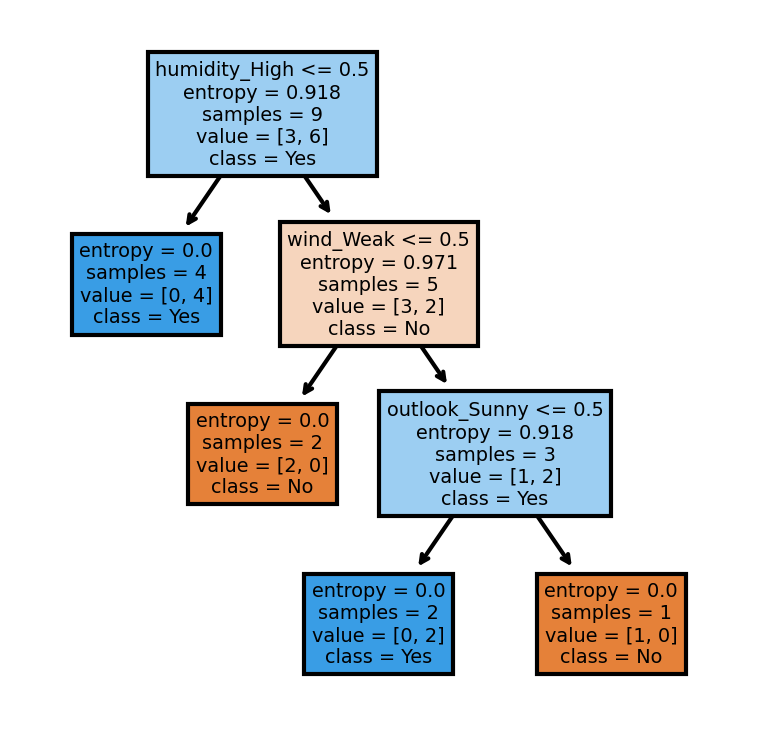

In [12]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [13]:
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.6
